In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jupyter_contrib_nbextensions
import seaborn as sns
from math import gcd, lcm
sns.set()

In [2]:
f1, A1 = 20, 1
f2, A2 = 3, 1
f3, A3 = 8, 1
fs = 8
ts = 1 / fs
min_time = 0
max_time = 50

In [3]:
t = np.arange(min_time, max_time, ts)
N = int(np.fix(max_time * fs))
freq = np.arange(len(t)) * fs / N

In [4]:
def ILPF(f: np.array, fc, phi):
    lpfilter = np.zeros(len(f), dtype=complex)
    for i in range((int)(len(f) / 2)):
        if (f[i] <= fc):
            lpfilter[i] = np.exp(-1j * phi * f[i] / fc)
    for i in range((int)(len(f) / 2), len(f)):
        if (f[i] >= (np.max(f) - fc)):
            lpfilter[i] = np.exp(-1j * phi * f[i] / fc)
    return lpfilter

# Upsample

In [5]:
def upsample(signal, fc1, K, freq):
    res = np.zeros(int(K * signal.size - K + 2))
    for i in range(int(K * signal.size - K + 2)):
        if i % K == 0:
            res[i] = signal[int(i / K)]
    samples_decimated = int(K * signal.size - K + 2)
    new_freq = np.linspace(0, np.max(freq), samples_decimated, endpoint=False)
    ilpf = ILPF(new_freq, fc1 / (2 * K), 0) * K
    res = np.real(np.fft.ifft(np.fft.fft(res) * ilpf))
    return res, new_freq

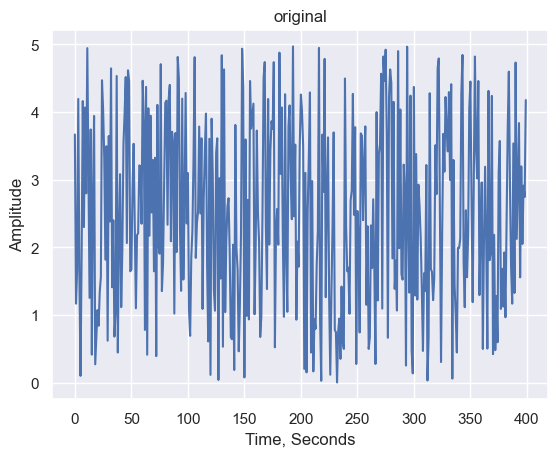

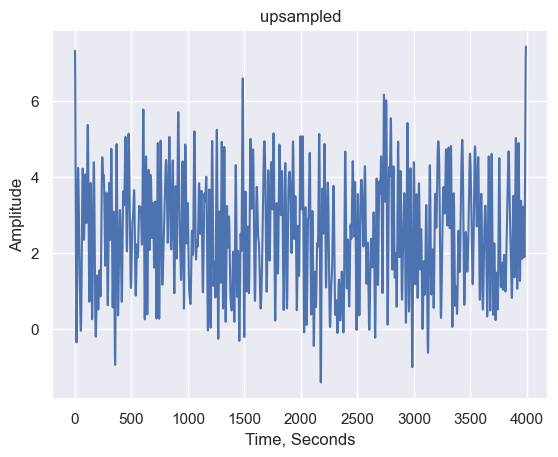

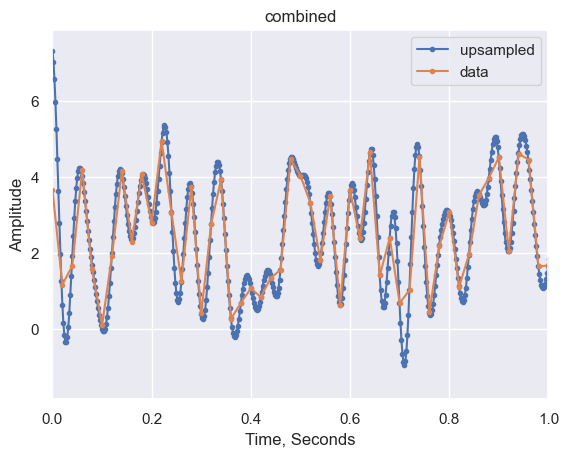

In [6]:
sin3 = A1 * np.sin(2 * np.pi * f1 * t)
sin3 = sin3 + 5*np.random.sample(len(sin3))
upsin3, new_freq = upsample(sin3, fs, 10,freq)

plt.title('original')
plt.plot(sin3)
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.show()

plt.title('upsampled')
plt.plot(upsin3)
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.show()

plt.title('combined')
plt.plot(new_freq, upsin3, '.-', freq, sin3, '.-')
plt.xlim(0,1)
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.legend(['upsampled', 'data'], loc='best')
plt.show()

# Downsample

In [7]:
def downsample(signal, fc1, N, freq):
    new_size = int(signal.size - (N - 1) * (signal.size - 1) / N)
    new_freq = np.linspace(0, np.max(freq), new_size, endpoint=False)
    ilpf = ILPF(new_freq, fc1 / (2 * N), 0) * N
    res = np.zeros(new_size)
    for i in range(signal.size):
        if i % N == 0:
            res[int(i / N)] = signal[i]
    return res, new_freq

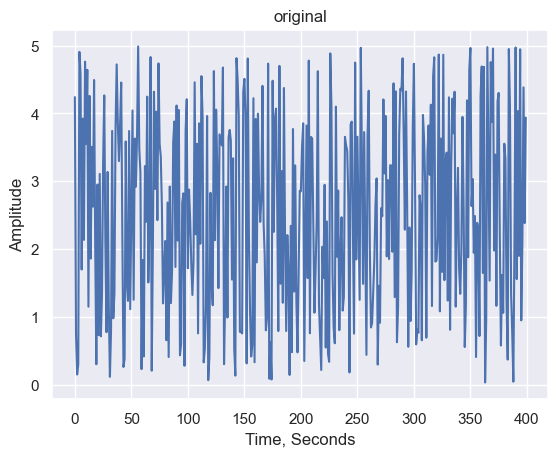

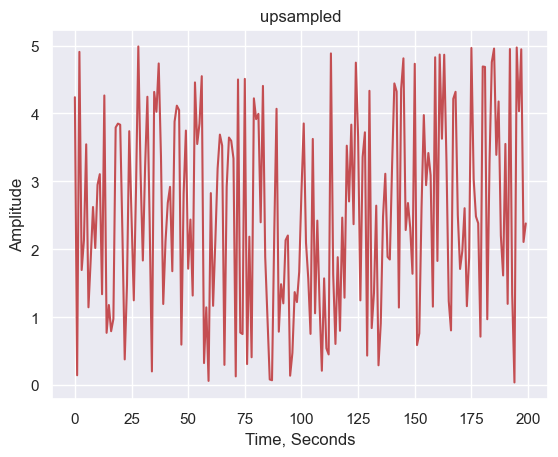

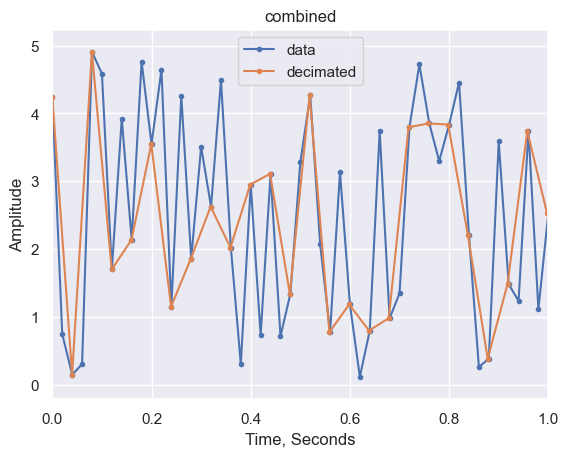

In [8]:
sin3 = A1 * np.sin(2 * np.pi * f1 * t)
sin3 = sin3 + 5*np.random.sample(len(sin3))
downsin3, new_freq = downsample(sin3, fs, 2, freq)

plt.title('original')
plt.plot(sin3)
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.show()

plt.title('upsampled')
plt.plot(downsin3, color='r')
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.show()

plt.title('combined')
plt.plot(freq, sin3, '.-', new_freq, downsin3, '.-')
plt.xlim(0,1)
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.legend(['data', 'decimated'], loc='best')
plt.show()

# Resample

In [11]:
def resample(signal, fc1, fc2, fs, freq):
    LCM = lcm(int(fc1), int(fc2))
    up_signal, up_freq = upsample(signal, fs, int(LCM / fc1), freq)
    res, res_freq = downsample(up_signal, fs, int(LCM / fc2), up_freq)
    return res, res_freq

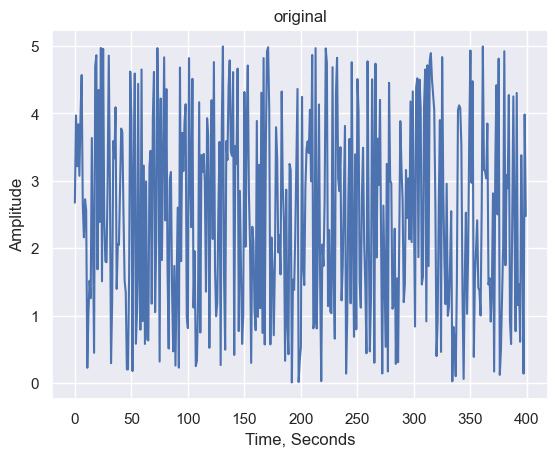

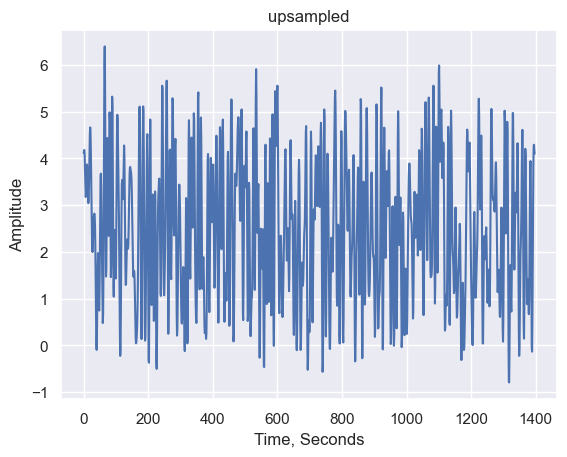

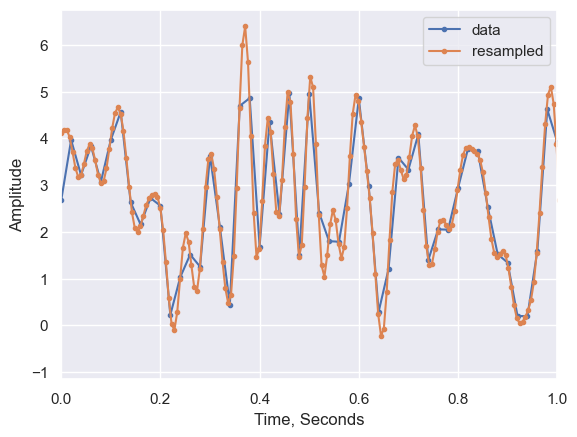

In [12]:
sin3 = A1 * np.sin(2 * np.pi * f1 * t)
sin3 = sin3 + 5*np.random.sample(len(sin3))
resampled_signal, new_freq = resample(sin3, 2, 7, fs, freq)


plt.title('original')
plt.plot(sin3)
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.show()

plt.title('upsampled')
plt.plot(resampled_signal)
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.show()

plt.plot(freq, sin3, '.-', new_freq, resampled_signal, '.-')
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.legend(['data', 'resampled'], loc='best')
plt.xlim(0,1)
plt.show()

# Fourier

In [13]:
def fourier_upsample(signal: np.array, rate):
    shifted_spectre = np.fft.fftshift(np.fft.fft(signal))
    shifted_spectre = np.pad(shifted_spectre, int((rate*signal.size - signal.size)//2))
    samples_decimated = int(len(shifted_spectre))
    new_freq = np.linspace(0, np.max(freq), samples_decimated, endpoint=False)
    return np.fft.ifft(np.fft.ifftshift(shifted_spectre)*rate), new_freq

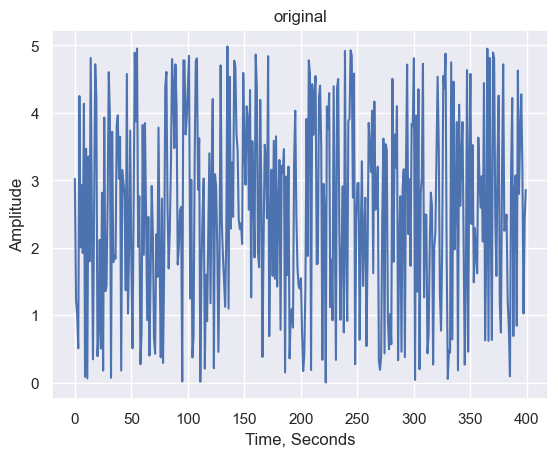

C:\Users\HUAWEI\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


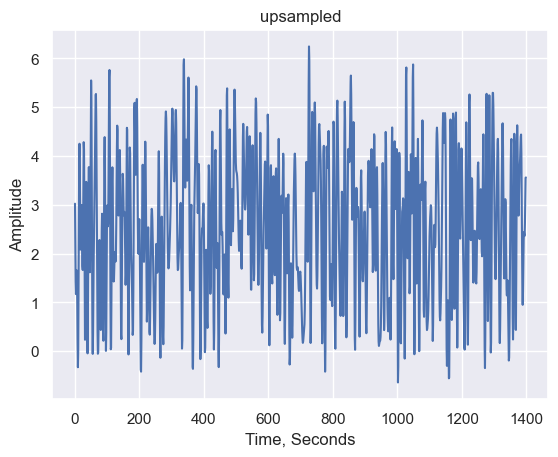

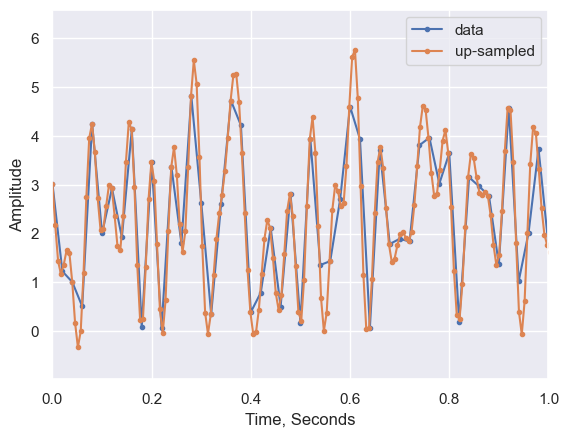

In [14]:
sin3 = A1 * np.sin(2 * np.pi * f1 * t)
sin3 = sin3 + 5*np.random.sample(len(sin3))
upsin3,new_freq = fourier_upsample(sin3, 3.5)

plt.title('original')
plt.plot(sin3)
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.show()

plt.title('upsampled')
plt.plot(upsin3)
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.show()

plt.plot(freq, sin3, '.-', new_freq, upsin3, '.-')
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.legend(['data', 'up-sampled'], loc='best')
plt.xlim(0,1)
plt.show()

# Fourier-Downsample

In [15]:
def fourier_downsample(signal: np.array, rate):
    shifted_spectre = np.fft.fftshift(np.fft.fft(signal))
    res_spectre = np.concatenate((shifted_spectre[int((signal.size - rate*signal.size)/2):int(signal.size/2)],
                                  shifted_spectre[int(signal.size/2):signal.size - int((signal.size - rate*signal.size)/2)]))
    new_size = int(len(res_spectre))
    new_freq = np.linspace(0, np.max(freq), new_size, endpoint=False)
    return np.fft.ifft(np.fft.ifftshift(res_spectre)*rate), new_freq

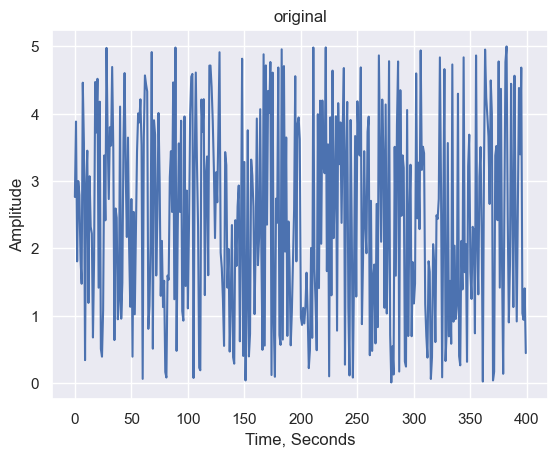

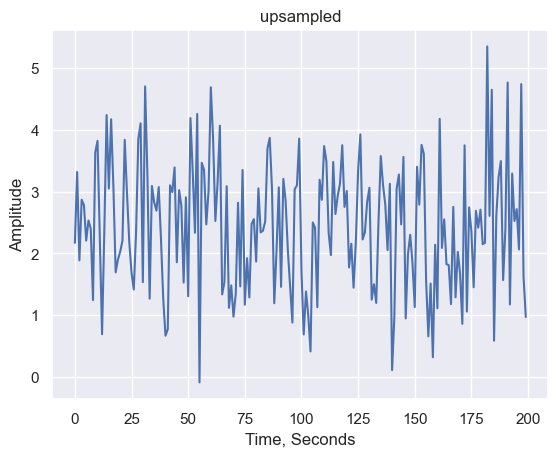

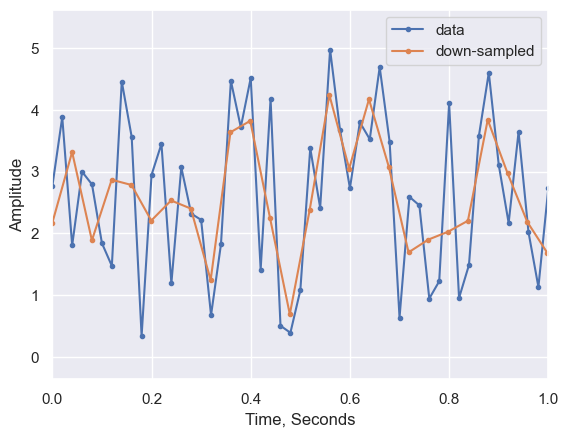

In [20]:
sin3 = A1 * np.sin(2 * np.pi * f1 * t)
sin3 = sin3 + 5*np.random.sample(len(sin3))
downsin3, new_freq = fourier_downsample(sin3, 0.5)

plt.title('original')
plt.plot(sin3)
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.show()

plt.title('upsampled')
plt.plot(downsin3)
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.show()

plt.plot(freq, sin3, '.-', new_freq, downsin3, '.-')
plt.xlabel('Time, Seconds')
plt.ylabel('Amplitude')
plt.legend(['data', 'down-sampled'], loc='best')
plt.xlim(0,1)
plt.show()